# The hypothesis will be : 
# How changing weather affects attendance bridges over the East River through cyclists in New York City?


# Data loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split
import warnings
warnings.filterwarnings('ignore')
import random

In [ ]:
df = pd.read_csv("nyc-east-river-bicycle-counts.csv")
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


# Data preprocessing 

Removing duplicates. Removing unnecessary columns["Unnamed: 0", "Day"]. Changing data types, inplace values "T" and "0.47 (S)" in column "Precipitation" by values of 0.01 (as a very small precipitation) and 0.47, becasue i don't see any difference in frequency of attending the bridges between rain and snow weather

In [ ]:
df.drop(columns = ["Unnamed: 0", "Day"],inplace = True)
df.drop_duplicates(inplace = True)
cols_to_change_type = ["High Temp (°F)",	"Low Temp (°F)",	"Precipitation",	"Brooklyn Bridge",	"Manhattan Bridge",	"Williamsburg Bridge"	,"Queensboro Bridge"	,"Total"]
df[cols_to_change_type] = df[cols_to_change_type].astype(dtype = "float", errors = "ignore")
df['Date']= pd.to_datetime(df['Date'])
# można rozbudować analizę o zależność ilości rowerzystów a dni tygodnia
df.Precipitation.replace(["T","0.47 (S)"], [0.01,0.47],inplace = True)
df.Precipitation.value_counts()
df.Precipitation = df.Precipitation.astype(dtype = "float")
df.set_index("Date",inplace = True)
df.sample(5)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2016-04-26,60.1,46.9,0.24,1997.0,3520.0,4559.0,2929.0,13005.0
2016-04-04,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0
2016-04-20,68.0,50.0,0.00,3450.0,6574.0,7639.0,4928.0,22591.0
2016-04-28,57.9,48.0,0.00,2486.0,4152.0,5336.0,3657.0,15631.0
2016-04-11,62.1,46.0,0.01,2005.0,3791.0,4334.0,3182.0,13312.0


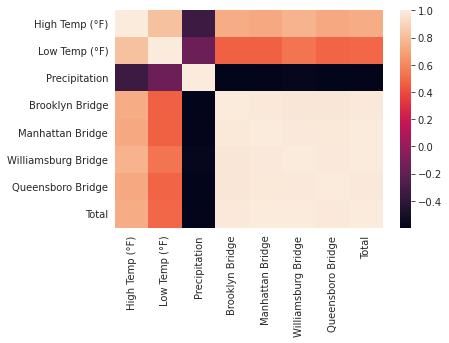

In [ ]:
sns.heatmap(df.corr())

Because of strong correlation between features i will do feature selection

In [ ]:
df.drop(columns = ["Brooklyn Bridge",	"Manhattan Bridge",	"Williamsburg Bridge"	,"Queensboro Bridge"],inplace = True)

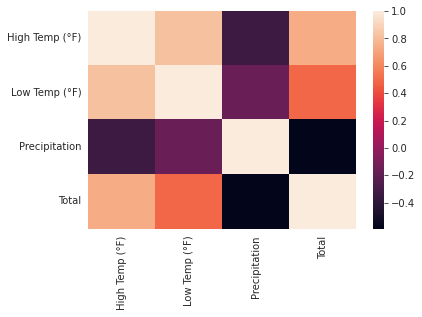

In [ ]:
sns.heatmap(df.corr())

Because of strong correlation between temperatures i will average temperature value

In [ ]:
df["Mean_Temp"] = (df['Low Temp (°F)'] + df["High Temp (°F)"]) / 2
df.drop(columns = ['Low Temp (°F)', "High Temp (°F)"], inplace= True)
df = df[["Mean_Temp", "Precipitation", "Total"]]
df.head()

,Mean_Temp,Precipitation,Total
Date,,,
2016-04-01,72.05,0.01,11497.0
2016-04-02,51.95,0.15,6922.0
2016-04-03,36.95,0.09,4759.0
2016-04-04,38.60,0.47,4335.0
2016-04-05,34.10,0.00,9471.0


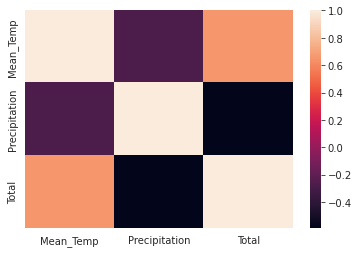

In [ ]:
sns.heatmap(df.corr())

# Data visualisation

For later analysis need, let's take a look on the charts showing relationship between number of cyclists and temperature, number of cyclists and precicpitation and basic statistical metrics. The charts shows the upward trend in number of cyclists to temperature and downward trend to value of precipitation

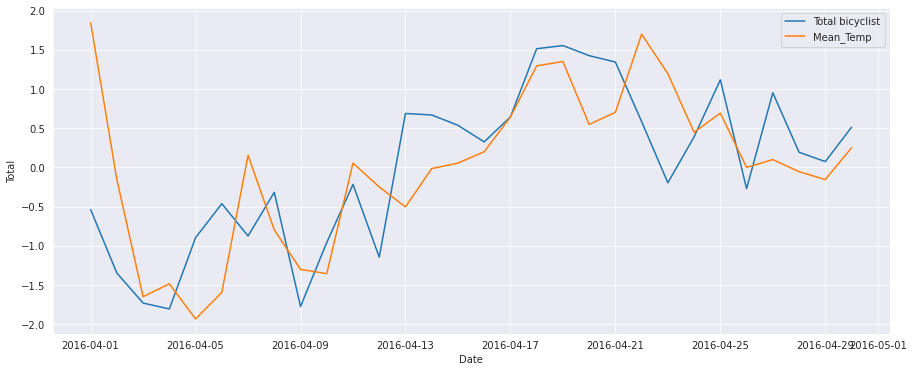

In [ ]:
plt.figure(figsize = [15, 6])
def standarization(X):
  return (X - X.mean()) / X.std()

sns.lineplot(data = df, x = "Date", y = standarization(df['Total']),label = "Total bicyclist")
sns.lineplot(data = df, x = "Date", y = standarization(df['Mean_Temp']),label = "Mean_Temp")
# sns.lineplot(data = df, x = "Date", y = standarization(df['Precipitation']),label = "Precipitation")

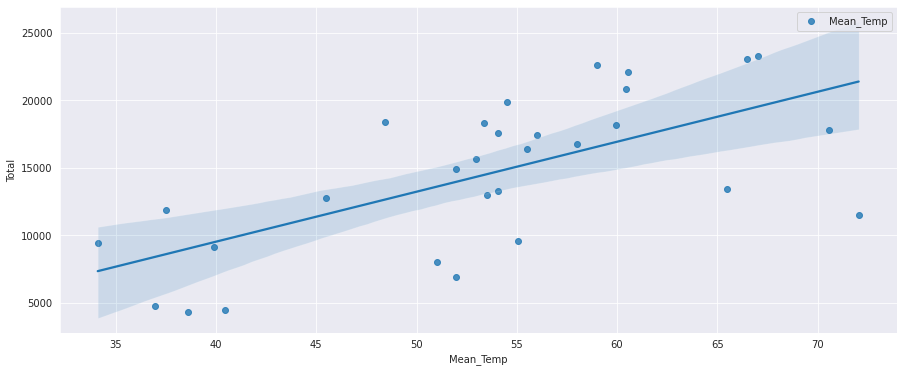

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = [15, 6])
sns.regplot(data = df, x = "Mean_Temp", y = "Total",label = "Mean_Temp")
plt.legend()

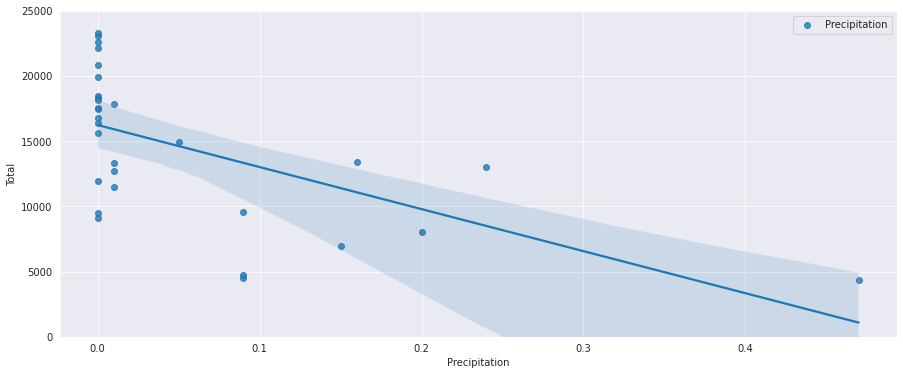

In [ ]:
plt.figure(figsize = [15, 6])
plt.ylim(0,25000)
sns.regplot(data = df, x = "Precipitation", y = "Total",label = "Precipitation")
plt.legend()

In [ ]:
df.describe()

,Mean_Temp,Precipitation,Total
count,30.000000,30.000000,30.000000
mean,53.496667,0.052667,14534.500000
std,10.034749,0.103489,5650.877227
min,34.100000,0.000000,4335.000000
25%,49.087500,0.000000,10071.250000
50%,54.050000,0.000000,15292.500000
75%,59.712500,0.080000,18281.250000
max,72.050000,0.470000,23318.000000


# Modelling

I will compare 4 models : Ridge, Linear , LASSO and SGD Regressions

In [ ]:
regs = [LinearRegression(),Ridge(alpha = 1),Lasso(alpha = 1),SGDRegressor()]
X = df.loc[:,["Mean_Temp","Precipitation"]]
y = df.Total
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
df_train = X_train
df_train["Total"] = y_train


In [ ]:
comp_table = pd.DataFrame()
scaler = StandardScaler()
lou = LeaveOneOut()

for valid, test_in in lou.split(df_train):

    valid_df, test_in_df = df_train.iloc[valid,:], df.iloc[test_in,:]
    X_valid = valid_df.drop(columns = ["Total"])
    y_valid = valid_df.Total
    X_test_in = test_in_df.drop(columns = ["Total"])
    y_test_in = test_in_df.Total
    scaler.fit(X_valid)
    X_valid = scaler.transform(X_valid)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    for reg in regs:
      model = reg
      model.fit(X_valid, y_valid)
      mse = mean_squared_error(y_test_in,model.predict(X_test_in))
      results = {"algorithm" : model.__class__.__name__,
                 "mse" : mse,
                 "rmse": mse**0.5,
                 "mape": mean_absolute_percentage_error(y_test_in,model.predict(X_test_in)),
                 "VS": (mse**0.5) / np.mean(y_test_in)}
                  
      comp_table = pd.concat([comp_table,pd.DataFrame(results,index = [0])])

In [ ]:
comp_table.sort_values(by = "rmse", ascending = True)

,algorithm,mse,rmse,mape,VS
0,Ridge,4.941250e+09,70294.026415,7.422028,7.422028
0,Lasso,5.144688e+09,71726.481489,7.573274,7.573274
0,SGDRegressor,5.147099e+09,71743.282096,7.575048,7.575048
0,LinearRegression,5.148241e+09,71751.240418,7.575889,7.575889
0,Ridge,7.920251e+09,88995.789975,7.466716,7.466716
...,...,...,...,...,...
0,LinearRegression,2.800426e+10,167344.737284,9.381888,9.381888
0,Ridge,2.948978e+10,171725.886198,14.936582,14.936582
0,Lasso,3.132040e+10,176975.709216,15.393208,15.393208
0,LinearRegression,3.134021e+10,177031.654604,15.398074,15.398074


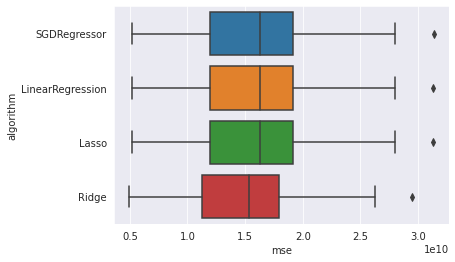

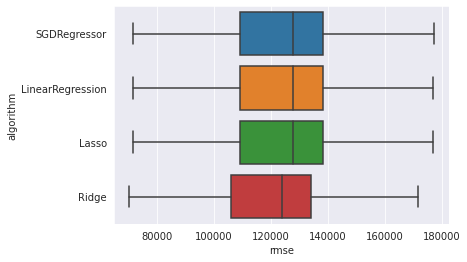

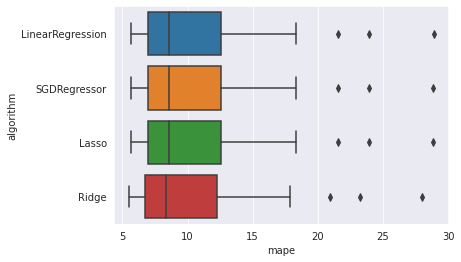

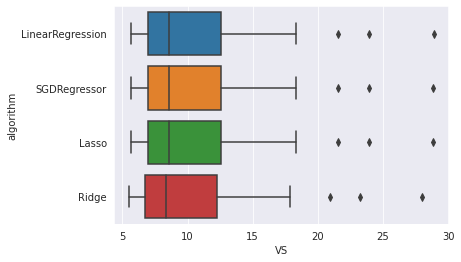

In [ ]:
for i in ["mse","rmse","mape","VS"]:
  order = (comp_table.groupby("algorithm").agg(median = (i, "median")).reset_index().sort_values(by = "median", ascending = False)["algorithm"])

  sns.boxplot(data = comp_table, y = "algorithm", x = i, order = order)
  plt.show()

It reveals that the most optimal model is ridge regression. I will set alpha hyperparameter

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X, y)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)
rid_reg = Ridge(alpha = 0.2)
X_train = standarization(X_train.drop(columns = "Total"))
rid_reg.fit(X_train,y_train)

MAE: -3265.70968
Config: {'alpha': 0.2}


Ridge(alpha=0.2)

Checking how model works on testing data

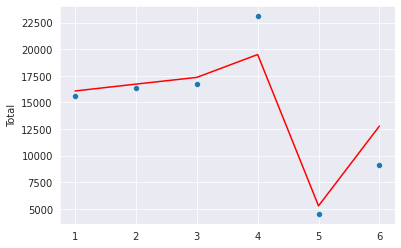

In [ ]:
sns.scatterplot(x = range(1, 7) , y = y_test)
sns.lineplot(x = range(1, 7), y = rid_reg.predict(X_test), color = "red")
plt.show()

In [ ]:
mse = mean_squared_error(y_test,rid_reg.predict(X_test))
mape = mean_absolute_percentage_error(y_test_in,model.predict(X_test_in))
rmse = mse**0.5
vs = (mse**0.5) / np.mean(y_test)
R2 = r2_score(y_test, rid_reg.predict(X_test))
print(f"MSE : {mse}\nRMSE : {rmse}\nMAPE : {mape}\nVS : {vs}\nR2 : {R2}")

MSE : 4572566.749097046
RMSE : 2138.356085664183
MAPE : 8.38362160174414
VS : 0.15010923476676685
R2 : 0.8705213643146981


Prediction for 3 random value of mean_temp and precipitation

In [ ]:
random_set = pd.DataFrame()
random_set["Mean_Temp"] = df.Mean_Temp.sample(3).values
random_set["Precipitation"] = df.Precipitation.sample(3).values
display(random_set)
random_predict = rid_reg.predict(standarization(random_set))
random_set["Prediction_of_number_of_cyclists"] = random_predict
display(random_set)

,Mean_Temp,Precipitation
0,51.95,0.00
1,67.05,0.00
2,56.00,0.01


,Mean_Temp,Precipitation,Prediction_of_number_of_cyclists
0,51.95,0.00,14293.371439
1,67.05,0.00,18922.815224
2,56.00,0.01,10604.188337
